In [9]:
# Imports
from gapminder import gapminder
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from datetime import date
from sklearn import linear_model, datasets
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# JODA: Oppimispäiväkirja

## Luento 1

Osallistuin 9.3.2021 järjestettyyn luentoon. Tämän oppimispäiväkirjan taustamateriaalina käytän luennolla käytettyä Jupyter Notebook -tiedostoa.

Luennon aiheena oli yleisesti käsitellä datatiedettä. Datatiede rakentuu neljän suuremman kokonaisuuden varaan: liiketoimintaosaaminen, ohjelmointi– ja tietokantaosaaminen, tilastollinen analyysi ja datalähtöinen viestintä sekä visualisointi. Se yhdistää siis tietoteknistä, matemaattista ja liiketoiminnalista osaamista. Datatieteessä tarkoituksena on kerätä, siivota ja rakentaa malleja jo olemassa olevan datan perusteella. Datalle luodaan siis informatiivista arvoa. Datan analysoinnin avulla pystytään mallintamaan esimerkiksi reaalimaailman ilmiöitä ja näitä malleja voidaan hyödyntää esimerkiksi yrityksen markkinoinnissa.

### Viisi oivallusta

1. Oivalsin mikä on datatieteen ydin ja mitä sen harjoittaminen vaatii. Oli yllättävää kuinka monitahoinen tieteenala on tosissaan kyseessä ja kuinka laaja kirjo muita tieteenaloja kuuluu datatieteen alle. 
2. Aluksi tuntui liki mahdottomalta ajatukselta oppia kaikki datatieteen metrokartassa olevat taidot ja tekniikat. Ymmärsin kuitenkin, että yhden ihmisen ei oletetakkaan osaavan kaikkea tätä. 
3. CRISP_DM -malli oli myös minulle uusi ja se syvensi käsitystä prosessista datatieteen ympärillä. Uusi asia oli myös määrä, kuinka paljon datatietelijän "arjesta" kuluu datan esikäsittelyyn, eikä mallien rakentamiseen.
4. Saatavien valmiiden työvälineiden kirjo on myös laaja, mutta opin, että usein muutama rivi omaa Python-koodia saattaa olla parempi vaihtoehto. Opin myös termin datalogia, joka on vanha nimitys datatieteelle. Tähän termiin olen törmännyt pariin otteeseen ennenkin. 
5. Suurin oivallukseni oli kuitenkin se, että ennen aihe oli vain vaikuttanut mielenkiintoiselta, mutta johdanto-luennon jälkeen koin aiheen omanani.

### Kehitysideat
  
1. Koska olen kiinnostunut ohjelmoinnista ja pääaineenani luen koneoppimista, olisin toivonut enemmän konkreettisia ohjelmointivinkkejä heti alkuun.

### Koodidemo

In [14]:
data = gapminder[gapminder['country'] == "Finland"]
print(data)

     country continent  year  lifeExp      pop     gdpPercap
516  Finland    Europe  1952   66.550  4090500   6424.519071
517  Finland    Europe  1957   67.490  4324000   7545.415386
518  Finland    Europe  1962   68.750  4491443   9371.842561
519  Finland    Europe  1967   69.830  4605744  10921.636260
520  Finland    Europe  1972   70.870  4639657  14358.875900
521  Finland    Europe  1977   72.520  4738902  15605.422830
522  Finland    Europe  1982   74.550  4826933  18533.157610
523  Finland    Europe  1987   74.830  4931729  21141.012230
524  Finland    Europe  1992   75.700  5041039  20647.164990
525  Finland    Europe  1997   77.130  5134406  23723.950200
526  Finland    Europe  2002   78.370  5193039  28204.590570
527  Finland    Europe  2007   79.313  5238460  33207.084400


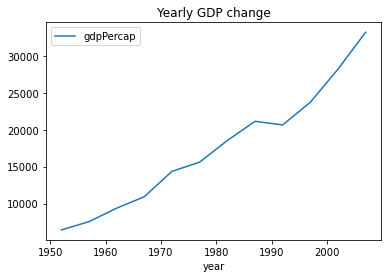

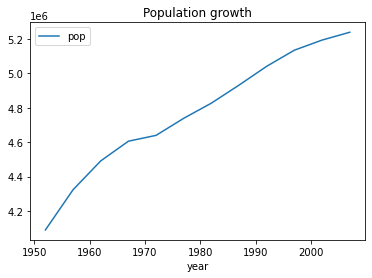

In [15]:
data.plot(x="year", y="gdpPercap" , title="Yearly GDP change")
data.plot(x="year", y="pop", title="Population growth")

## Luento 2

Osallistuin 16.3.2021 järjestettyyn luentoon. Tämän oppimispäiväkirjan luvun taustamateriaalina käytän luentomateriaalina käytettyä Jupyter Notebook -tiedostoa, sekä omia muistiinpanojani luennosta.

Luennolla kaksi käsiteltiin datan keräämistä ja jalostamista, erilaisista datan muodoista, sekä keskusteltiin data-analytiikasta osana liiketoimintaa ja kuinka se voi parantaa yrityksien suorituskykyä. Data-analytiikan tarkoitus on lisätä ymmärrystä yrityksen liiketoimintaprosesseista. Tällä saralla analytiikka voidaan jakaa neljään erilaiseen kokonaisuuteen: 

- Kuvaileva analytiikka: Selittää mitä on tapahtunut.
- Diagnosoiva analytiikka: Selittää miksi on tapahtunut.
- Ennakoiva analytiikka: Ennakoi tulevaa liiketoimintatilannetta.
- Ohjaava analytiikka: Selittää mitä pitäisi tehdä.

Datan kerääminen ja jalostaminen on suuri osa koko datatieteen työprosessia. Alla olevassa kuvassa on luennolla esitetty Philip Guon laatima kaavio juuri tästä prosessista. Kuvassa on esitelty datatieteen neljä päävaihetta: tiedon esikäsittely, vuoropuhelu analyysin ja tulosten reflektion välillä ja tulosten viestiminen. Keskitytään kuitenkin vasemman yläkulman kokonaisuuteen, tiedon esikäsittelyyn.

![Datatieteen työprosessi](https://cacm.acm.org/system/assets/0001/3678/rp-overview.jpg)

Sanotaan, että tiedon esikäsitteleminen, eli datan kerääminen sekä jalostaminen, vie noin 80% ajasta joka työhön kuluu. Datan keruun ongelmia ovat muun muassa datan ajankohtaisuuden, sekä lähteen selvittäminen. Liian vanha data saattaa tuottaa tuloksia, jotka ei enää nykytilanteessa päde tai väärästä lähteestä saatu data vääristää tuloksia. Analyysin tietolähteenä voi käyttää esimerkiksi eri verkkosivuja kuten keskustelupalstoja. Keskustelupalstan tiedon avulla voidaan selvittää esimerkiksi ihmisten mielipiteitä tai kuluttajatottumuksia. Tämän datan keräämiseen voidaan hyödyntää ryömijiä ja raapijoita sekä näiden kahden erilaisia yhdistelmiä.

Ryömijällä tarkoitetaan robottia, joka käy systemaattisesti läpi verkkosivuja. Ryömijälle annetaan verkko-osoitteita, joita se käy lävitse systemaattisesti. Ryömijän törmätessä uuteen verkko-osoitteeseen sivulla, lisää se tämän osoitteen osoitejonoon läpikäytäväksi. Raapija taas kerää tietoa näiltä verkkosivuilta. Raapija voidaan ohjelmoida tunnistamaan esimerkiksi kaikki verkkosivujen taulukkomuotoinen data käyttämällä talletettavan datan tunnistamiseen HTML *table-tagia*. Tämän tagin sisällä oleva data on taulukkomuotoista.

Raa'an datan analysointi on usein hankalaa ja tuottaa vääriä tuloksia. Analysoinnin ja mallien rakentamisen helpottamiseksi, dataa on järkevää formatoida ja siivota. Tätä prosessia kutsutaan myös tiedon välittämiseksi (data wrangling/data munging). Jos dataa on monesta eri lähteestä eri muodoissa, kuten CSV-muodossa ja tekstitiedostoina, on järkevää integroida datat. Tekstimuotoinen data voidaan muuttaa esimerkiksi myös CSV-muotoon, jolloin eri lähteiden tiedot saadaan yhdistettyä esimerkiksi samaan tietotauluun helpommin. Esimerkiksi numeerinen data voi olla aluksi merkkijonomuodossa, jolloin matemaattisten operaatioiden implementoinnin helpottamiseksi se on järkevää muuttaa numeeriseksi. Dataa voi olla järkevää myös yhdistellä ja järjestellä analysoinnin helpottamiseksi. Dataa voidaan siivota ja jalostaa manuaalisesti rivi kerrallaan, käyttämällä erilaisia skriptejä, jotka tekevät tämän automaattisesti tai hyödyntämällä datan siivoukseen tarkoitettuja työkaluja.

### Viisi oivallusta
1. Datan kerääminen itse käyttäen ryömijöitä ja raapijoita on verrattain helppoa.
2. Datan keräys suoraan verkkosivuilta ei välttämättä ole eettistä.
3. Datan siivoaminen on todella työlästä ja vaatii pitkää pinnaa.
4. Yllättävän harvat yritykset hyödyntävät nykypäivänä data-analytiikkaa liiketoiminnassaan.
5. Pandas-kirjasto on yllättävän tehokas apu datan siivoamisessa.

### Kehitysideat
1. Parempi esimerkki datan keräämisestä joltain nettisivulta käyttäen ryömijöitä ja raapioita. Helpottaisi esimerkiksi viikon koodidemon tekemistä.

### Koodidemo
Web Scraping käyttäen BeautifulSoup-kirjastoa. Haetaan soccerbase.com sivustolta tiedot Arsenalin kauden 20/21 pelattujen pelien tuloksista ja päivämääristä. Luodaan datasta pandas-dataframe jatkoa varten.

In [16]:
source = requests.get('https://www.soccerbase.com/teams/team.sd?team_id=142&season_id=153&teamTabs=results').text
soup = BeautifulSoup(source, 'lxml')
table = soup.find('table', {'class': 'soccerGrid'})

rows = table.find_all('tbody')
# date, result (win=1, draw=0, lost=-1)
data = []
for row in rows:
    date_raw = row.find('td', {'class': 'dateTime'}).find('span', {'class': 'hide'}).text
    date_formatted = date.fromisoformat(date_raw.split(' ')[0]) 
    # Game has been played
    if(date.today() > date_formatted):
        results_of_game = row.find_all('td', {'class': ''})
        for result in results_of_game:
            if(result.text != "" and "W" in result.text): 
                data.append([date_formatted, 1])
            elif(result.text != "" and "D" in result.text):
                data.append([date_formatted, 0])
            elif(result.text != "" and "L" in result.text):
                data.append([date_formatted, -1])
        
df = pandas.DataFrame(data, columns=['Date', 'Result'])
df.head()

,Date,Result
0,2020-08-29,0
1,2020-09-12,1
2,2020-09-19,1
3,2020-09-23,1
4,2020-09-28,-1


## Luento 3

Osallistuin 23.3.2021 järjestettyyn luentoon. Tämän oppimispäiväkirjan luvun taustamateriaalina käytän luentomateriaalina käytettyä Jupyter Notebook -tiedostoa, sekä omia muistiinpanojani luennosta.

Luennolla käsiteltiin koneoppimisen periaatteita ja otettiin hieman syvempi katsaus ohjattuun oppimiseen. Koneoppiminen ja tekoäly ovat tällä hetkellä todella trendikkäitä aiheita, niin opiskelijoiden keskuudessa kuin yritysmaailmassa. On tärkeää kuitenkin muistaa, että tekoäly ei ole avain onneen. Yrityksellä on oltava hyvä liiketoimintamalli ja bisnesidea, jotta tekoälyllä voidaan luoda yritykselle jotain lisäarvoa. Tekoäly ei siis tee liiketoiminnasta maagisesti kannattavaa.

Luennolla otettiin katsaus koneoppimiseen ohjatun oppimisen kautta. Ohjatussa oppiminen on koneoppimisen menetelmä, jossa opetusaineiston perustella muodostetaan luokittelija. Luokittelija tunnistaa syötedatasta erilaisia piirteitä, joiden avulla syötettä luokitellaan. Luokittelija antaa siis tuloksen, mihin ennalta määrättyyn luokkaan data kuuluu. Opetusvaiheessa mallille annetaan joukko syötedataa sekä tulokset, joita syötedatasta tulisi seurata. Opetusvaiheen tuloksena saadaan malli, jonka avulla tuntematonta syötedataa voidaan luokitella.

Piirteet, joiden avulla dataa luokitellaan, ovat datassa esiintyviä muuttujia. Nämä muuttujat luokittelevat esimerkiksi potilaan terveyden tilan. Terveyden tilan luokitteluun sopivia piirteitä voisi olla esimerkiksi kuume, veriarvot ja yleinen vointi. Jos potilaalla on korkea kuume ja tulehdusarvot korkealla, voidaan potilas luokitella sairaaksi. Ihmisen on tunnistettava datasta piirteitä, jonka avulla luokittelija toimii. 

Prosessia, jossa piirteitä erotetaan datasta, kutsutaan piirteiden suunnitteluksi (engl. feature engineering). Piirteiden suunnittelussa ymmärrystä ja tietoa siitä mitä data kuvaa, hyödynnetään piirteiden luomiseen. Hyvä piirteiden suunnittelu on koneoppimisen A ja O. Huono piirre suunnittelu johtaa heikkoihin malleihin, koska oppimisen kautta tuotettu malli ei osaa keskittyä datassa luokittelun kannalta relevantteihin asioihin. Esimerkkinä erilaisista piirresuunnittelun prosesseista otetaan tässä käsittelyyn standardointi. Standardoinnissa datasta tunnistetaan erilaisia ominaisuuksia, kuten mittakaavoja. Jos data sisältäisi esimerkiksi mittakaavoja, voitaisiin näitä käyttää piirteinä. Ensimmäisenä mittakaavat, kuten metrit ja sentit, olisi kuitenkin muutettava samaan muotoon eli harmonisoitava.

### Viisi oivallusta
1. Ohjattu oppiminen on verrattain helppo koneoppimisen menetelmä ja usein hyvin käyttökelpoinen.
2. Kohinaisesta datasta piirteiden löytäminen saattaa olla haasteellista.
3. On tärkeää ymmärtää mitä data kuvaa, jotta piirteitä voidaan erottaa.
4. Dataa on oltava tarpeeksi, jotta malli voidaan opettaa.
5. On muistettava jättää osa datasta testausvaiheeseen, eikä opettaa mallia koko datasetillä.

### Kehitysideaa
Luento oli hyvä ja esimerkit laajoja, joten en keksi mitään kehitettävää.

### Koodidemo
Tehdään lyhyt demo hyödyntäen Pythonin lineaarista regressiota. Käytetään datana scikit learnin diabetes datasettiä.

Regression score (1 means perfect): 0.43


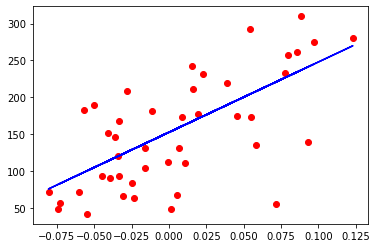

In [58]:
x, y = datasets.load_diabetes(return_X_y=True)

# Otetaan vain yksi piirre mukaan malliin.
x = x[:, np.newaxis, 2]

# Jaetaan osa datasta testidataksi.
test_batch_size = int(len(x) * 0.10)
x_train = x[:-test_batch_size]
x_test = x[-test_batch_size:]
y_train = y[:-test_batch_size]
y_test = y[-test_batch_size:]

model = linear_model.LinearRegression()

# Opetetaan malli.
model.fit(x_train, y_train)

# Ennustetaan testisetin perusteella.
y_pred = model.predict(x_test)

print('Regression score (1 means perfect): %.2f' %r2_score(y_test, y_pred))

plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='blue')
plt.show()

## Luento 4
Osallistuin 30.3.2021 järjestettyyn luentoon. Tämän oppimispäiväkirjan luvun taustamateriaalina käytän luentomateriaalina käytettyä Jupyter Notebook -tiedostoa, sekä omia muistiinpanojani luennosta.

Luennon 4 aiheena oli käsitellä kurssilla suoritettavaa laajempaa harjoitustyötä hieman tarkemiin. Luennolla pohdittiin, miten harjoitustyötä kannattaisi lähteä lähestymään. Suositeltua oli lähestyä harjoitustyötä, kuten työelämässäkin eli koko työn lähtökohtana olisi liiketoimintaongelma, eikä niinkään data. Harjoitustyön aihetta lähdettiin lähestymään Jeff Pattonin esittelemän mahdollisuuskehikon avulla. Seuraavaksi käydään läpi, miltä tämä mahdollisuuskehikko näyttää oman harjoitustyöni kanssa. Mahdollisuuskehikon voi alottaa ongelmasta tai ratkaisusta. Oma harjoitustyöideani ei ole hirveän kaupallinen, joten jotkut kohdat saattavat vaikuttaa hassuilta.

1. Ongelma/ratkaisu: Miten tietää, mitkä #covid19-twiitit ovat tarua ja mitkä totta? / Luokittelija, joka opetetaan tunnistamaan COVID19 aiheiset epätodet uutiset.
2. Ratkaisun käyttäjät: Normaalit ihmiset päivittäisessä elämässään.
3. Ongelmaan olemassa olevat ratkaisut: Valmiit fact checkerit, kuten [FactCheck.org](https://www.factcheck.org)
4. Liiketoimintaongelma: Väärä informaatio ajaa ihmisiä tekemään tyhmiä päätöksiä.
5. Miten ratkaisua käytetään: Julkaistaan esim. palvelu, johon käyttäjät voivat syöttää twiitin ja palvelu laskee sen todenmukaisuudelle prosentin tms.
6. Miten mitata saatuja hyötyjä: Kysyä käyttäjiltä analyysin jälkeen, että oliko analyysi heidän mielestään hyvä?
7. Teknologian hyväksyntä: Yksinkertainen käyttöliittymä, joten ratkaisua helppo käyttää.
8. Miten mitata ratkaisun vaikutusta liiketoimintaan: Hmm?
9. Budjetti: 0€.

Luennolla tehtiin myös ensimmäistä kertaa tehtävä pienryhmissä. Ohjeet olisivat voineet olla selkeämmät, mutta muuten pienryhmätyöskentely oli mukavaa. Kurssitovereiden kanssa keskustelu on aina hyödyllistä ja ainakin omalla kohdallani tehostaa oppimista. Harjoitustyön käytännön asioihin syvennyttiin myös. Keskusteltiin jo ennestään käsitellyistä asioista, kuten datan hankkimisesta (esim. raapijat & ryömijät). Datan tarkastelu ja käsittely tulee olemaan itselle tärkeä vaihe harjoitustyössä, jotta ihmisten kirjoittamista teksteistä saadaan mahdollisimman yhtenäisiä NLP-mallin kehittämiseksi. Aineistoni tuskin tarvitsee hirveästi rikastaa. Visualisointeja voi. tehdä esimerkiksi tietyn sanan esiintymismäärästä.

### Viisi oivallusta
1. Vaikka aihe olisi valmiina, on silti hyvä suunnitella ennen aloittamista.
2. Työ vaatii loppupeleissä paljon aikaa ja iteraatioita.
3. Järkevien datan visualisointien keksiminen voi olla haastavaa.
4. Twiitin siivoaminen NLP-mallin rakentamista varten voi olla työlästä.
5. Mahdollisuuskehikko tarjoaa hyvän tuen suunnitteluvaiheeseen.

### Kehitysidea
Pienryhmätyöskentelyyn hieman enemmän aikaa ja täsmällisemmät ohjeet.

### Koodidemo
Pieni NLP-demo Pythonilla, missä lasketaan sanojen esiintymismääriä nettisivulla.

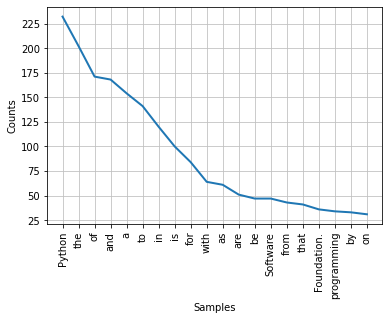

In [12]:
src = requests.get('https://en.wikipedia.org/wiki/Python_(programming_language)').text
soup = BeautifulSoup(src, 'html5lib')
txt = soup.get_text(strip=True)
tokens = [token for token in txt.split()]
sr = stopwords.words('english')
c_tokens = [t for t in tokens if t not in sr or t != '-']
freq = nltk.FreqDist(c_tokens)
freq.plot(20, cumulative=False)

## Luento 5
Katsoin 12.4.2021 järjestetyn vierailuluennon jälkeenpäin tallenteena. Tämän oppimispäiväkirjan luvun taustamateriaalina käytän omia muistiinpanojani luennosta.

